# Analysis of the Proton Bunch parameters (MCMC Version)

Posterior is sampled using MH Algorithm

In [11]:
using FileIO, ImageMagick, ImageIO, Colors, HDF5
using Distributions
using PyPlot
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using LinearAlgebra
import HDF5
using BenchmarkTools
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BenchmarkTools
using DSP
using BAT 

In [2]:
SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 9

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [13]:
include("../src/src.jl")
include("../src/plots.jl")

corner_plots (generic function with 1 method)

In [32]:
# The folder with event files: 

files = "../../AWAKE-Run-2/data/05-22/31/" .* readdir("../../AWAKE-Run-2/data/05-22/31/");

In [33]:
epath = files[122] 
edata = get_event_data(epath);

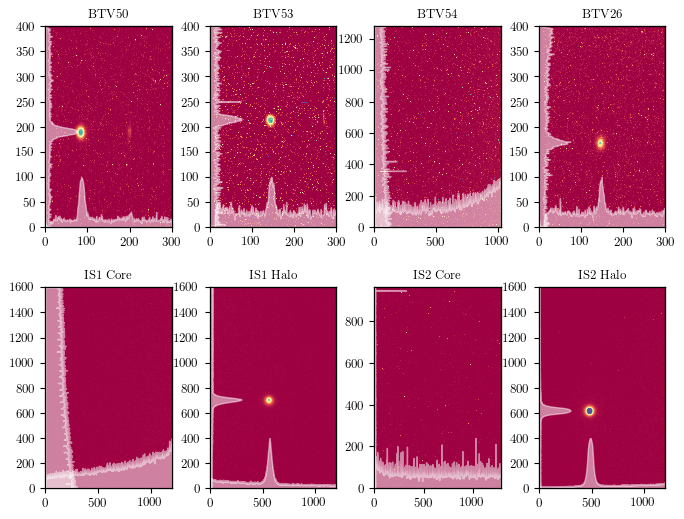

PyObject Text(0.5, 1.0, 'IS2 Halo')

In [6]:
plot_event_data(edata)

In [7]:
projections = def_projections(edata, [1,2,4,6,8]);

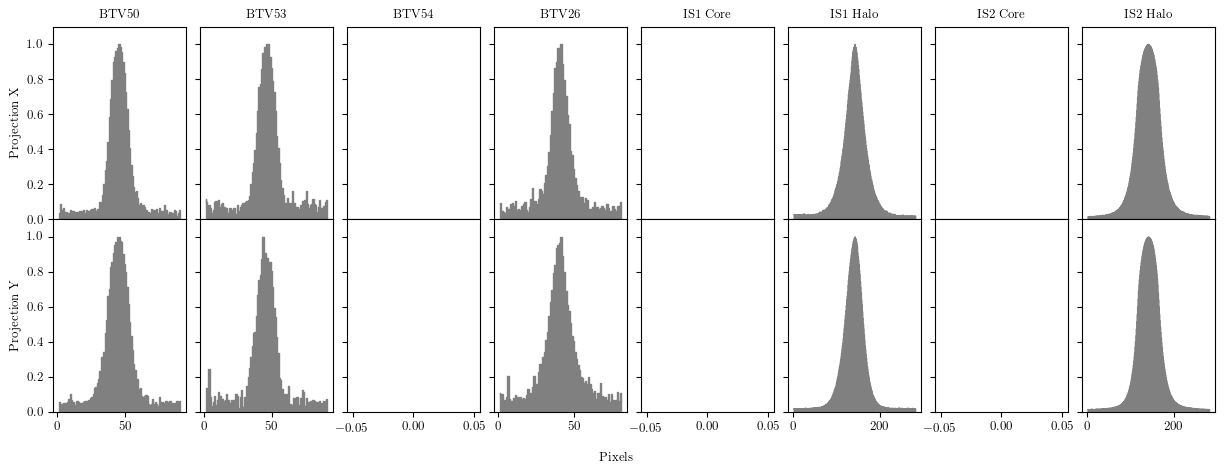

PyObject Text(0.5, 0.01, 'Pixels')

In [8]:
plot_projections(projections)

In [12]:
prior = def_prior_1g(projections)
log_likelihood = log_lik_ndiff(d=projections);
posterior = PosteriorDensity(log_likelihood, prior)

nsamples = 5*10^5
nchains = 4

burnin = MCMCMultiCycleBurnin(
    max_ncycles = 30,
    nsteps_per_cycle = 40000
)

convergence = BrooksGelmanConvergence(
        threshold = 1.15,
        corrected = false
    );

@time samples_tot = bat_sample(
    posterior,
    MCMCSampling(
        mcalg = MetropolisHastings(),
        trafo = NoDensityTransform(),
        burnin = burnin,
        convergence=convergence,
        nchains = nchains,
        nsteps = nsamples,
        strict = false
    )
);

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44
┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/samplers/mcmc/chain_pool_init.jl:56
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/samplers/mcmc/chain_pool_init.jl:173
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/samplers/mcmc/multi_cycle_burnin.jl:35
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tu

913.273858 seconds (5.35 G allocations: 1.247 TiB, 42.20% gc time, 0.00% compilation time)


In [14]:
mean_sample = mean(samples_tot.result)

ShapedAsNT((tr_size_core = [0.09092074161548026, 0.1322940298573284], ang_spr_core = [6.447896267690864, 5.2726581952462235], waist_core = [2.7340649677948203], tr_size_halo = [0.15, 0.15], ang_spr_halo = [6.0, 6.0], mixt_pow = 1.0, waist_halo = [2.8], algmx = [45.407040447101735, 45.960978484134756, 40.487371545298124, 140.45550567807004, 139.91751938288374], algmy = [44.769604660499574, 44.958883957478456, 40.31719742794034, 137.8594705660492, 140.88237724576078], pedestal = [0.04796069163816624, 0.06656164934534531, 0.08611297225042647, 0.02195439088076863, 0.01841767381995165], light_fluct = [0.15469027758210882, 0.02414829241195768, 0.17299318972340202, 0.0871730664907527, 0.0842857317050523], bckgr_fluct = [0.014780935172513261, 0.03465410575413016, 0.03838610928735461, 0.0037168695827832425, 0.003197085045435954], light_amp = [15.91631489066197, 13.868056181602471, 12.45160615619332, 48.07243659959224, 60.71545007425746], resx = [1.0, 1.0, 1.0, 3.0, 3.0], resy = [1.0, 1.0, 1.0, 

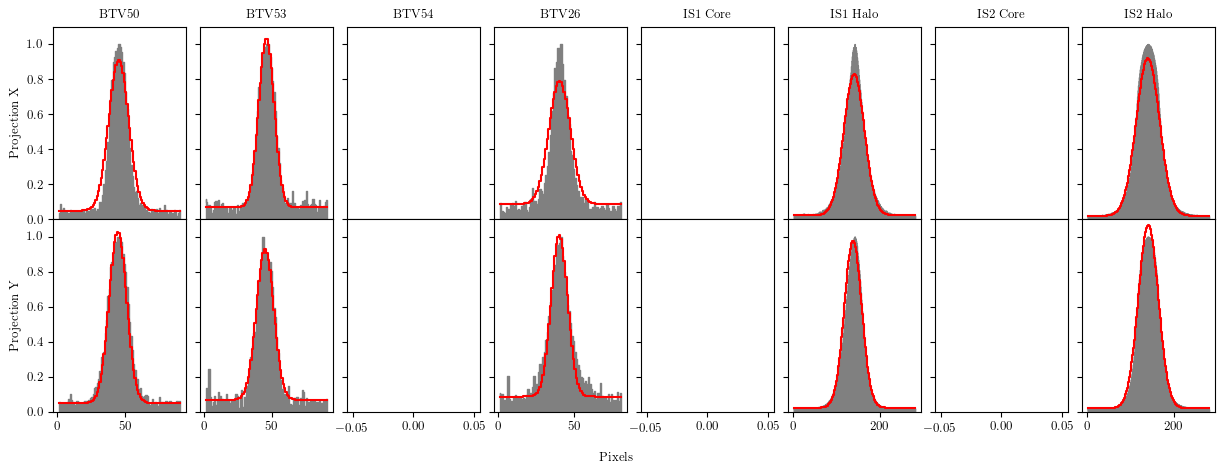

PyObject Text(0.5, 0.01, 'Pixels')

In [15]:
mean_event = generate_event(mean_sample[1], projections);

plot_projections(projections, model_data=mean_event)

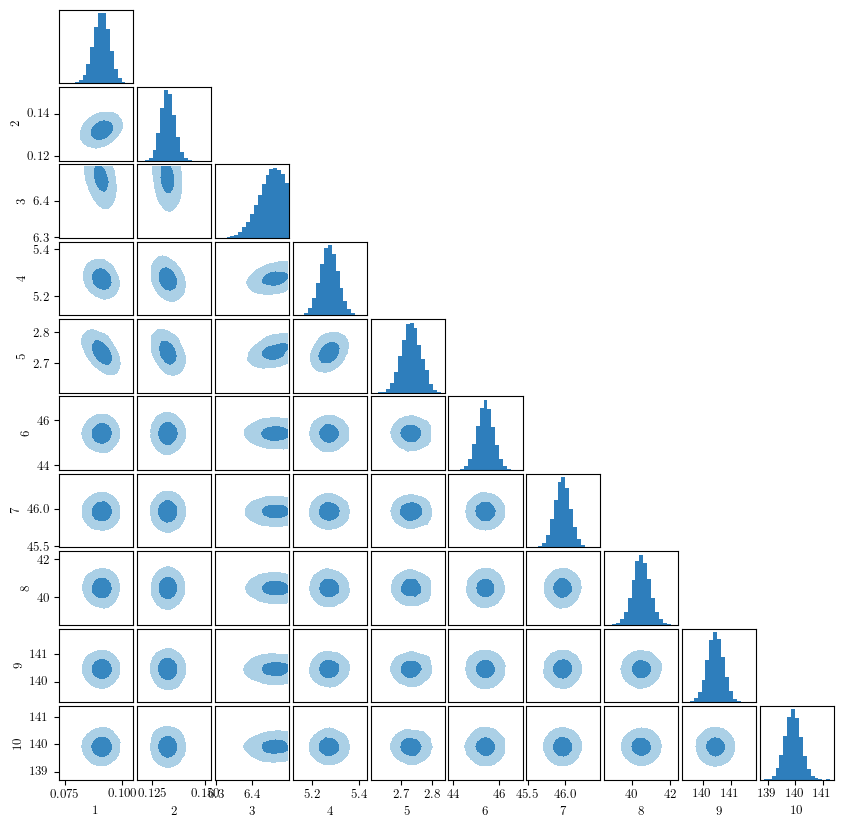

In [18]:
dims = 1:10
names = dims
levels = [0.01, 0.8, 0.95,  1,]
# levels = [0.001, 0.98, 1,]
figsize = (10,10)
n_bins = 20

corner_plots(samples_tot.result, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)